## Download dataset

In [1]:
import os 

if os.path.exists("/content/dataset/img_dir/ISIC2018_Task1-2_Training_Input") == False:
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Training_Input.zip
    
    !unzip /content/ISIC2018_Task1-2_Training_Input.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Test_Input.zip
    !unzip /content/ISIC2018_Task1-2_Test_Input.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Test_GroundTruth.zip
    !unzip /content/ISIC2018_Task1_Test_GroundTruth.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Training_GroundTruth.zip
    !unzip /content/ISIC2018_Task1_Training_GroundTruth.zip

    !rm ISIC2018_Task1-2_Test_Input.zip ISIC2018_Task1-2_Training_Input.zip ISIC2018_Task1_Test_GroundTruth.zip  ISIC2018_Task1_Training_GroundTruth.zip

    !mkdir dataset
    %cd dataset
    !mkdir img_dir
    !mkdir ann_dir
    %cd /content
    !mv /content/ISIC2018_Task1-2_Training_Input /content/dataset/img_dir
    !mv /content/ISIC2018_Task1-2_Test_Input /content/dataset/img_dir

    !mv /content/ISIC2018_Task1_Training_GroundTruth /content/dataset/ann_dir
    !mv /content/ISIC2018_Task1_Test_GroundTruth /content/dataset/ann_dir

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 extracting: ISIC2018_Task1-2_Training_Input/ISIC_0014922.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0014923.jpg  
 extracting: ISIC2018_Task1-2_Training_Input/ISIC_0014925.jpg  
 extracting: ISIC2018_Task1-2_Training_Input/ISIC_0014926.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0014927.jpg  
 extracting: ISIC2018_Task1-2_Training_Input/ISIC_0014928.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0014929.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0014930.jpg  
 extracting: ISIC2018_Task1-2_Training_Input/ISIC_0014931.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0014932.jpg  
 extracting: ISIC2018_Task1-2_Training_Input/ISIC_0014933.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0014936.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0014937.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0014938.jpg  
 extracting: ISIC2018_Task1-2_Training_Input/IS

## Install MMSegmentation

In [2]:
# Install PyTorch
!conda install pytorch==1.12.0 torchvision==0.13.0 torchaudio==0.12.0 cudatoolkit=11.3 -c pytorch
# Install mim
!pip install -U openmim
# Install mmengine
!mim install mmengine
# Install MMCV
!mim install 'mmcv >= 2.0.0rc1'

/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 5.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 26.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 9.5 MB/s eta 0:00:00


In [3]:
!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .
# %cd ../

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 15035, done.
remote: Counting objects: 100% (602/602), done.
remote: Compressing objects: 100% (414/414), done.
remote: Total 15035 (delta 226), reused 378 (delta 164), pack-reused 14433
Receiving objects: 100% (15035/15035), 20.23 MiB | 18.03 MiB/s, done.
Resolving deltas: 100% (10535/10535), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmsegmentation


In [4]:
# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.0.0


In [5]:
%cd ../
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

/content
Cloning into 'mmdetection'...
remote: Enumerating objects: 36213, done.
remote: Counting objects: 100% (864/864), done.
remote: Compressing objects: 100% (482/482), done.
remote: Total 36213 (delta 430), reused 665 (delta 369), pack-reused 35349
Receiving objects: 100% (36213/36213), 56.66 MiB | 18.26 MiB/s, done.
Resolving deltas: 100% (25365/25365), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


In [6]:
import mmdet
print(mmdet.__version__)

3.0.0


## Customize dataset

In [7]:

!pwd
%cd ../

/content/mmdetection
/content


In [8]:

classes = ('outside', 'inside')
palette = [[0, 0, 0], [255, 255, 255]]

Định nghĩa một lớp (class) ISICTask1DatasetX kế thừa từ lớp BaseSegDataset và đăng ký lớp này với mmdetection thông qua hàm @DATASETS.register_module(). Lớp ISICTask1DatasetX này được sử dụng để tải dữ liệu và chuẩn bị cho tác vụ phân đoạn hình ảnh.
Cụ thể, lớp ISICTask1DatasetX này có một số đặc điểm như sau:

Nó sử dụng hình ảnh định dạng .jpg và bản đồ phân đoạn định dạng .png. Điều này được chỉ định thông qua các tham số img_suffix và seg_map_suffix trong lời gọi hàm super().init().

Lớp này định nghĩa một dictionary METAINFOS chứa thông tin về số lượng lớp (classes) và palette (màu sắc) được sử dụng trong bản đồ phân đoạn. Thông tin này được sử dụng để hiển thị kết quả phân đoạn.

Lớp này không định nghĩa các phương thức mới, mà chỉ sử dụng các phương thức được định nghĩa trong lớp BaseSegDataset để tải và chuẩn bị dữ liệu cho tác vụ phân đoạn.

In [9]:

from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset

classes = ('outside', 'inside')
palette = [[0, 0, 0], [255, 255, 255]]

@DATASETS.register_module()
class ISICTask1DatasetX(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='_segmentation.png', **kwargs)

In [10]:
%cd mmsegmentation

/content/mmsegmentation


## Config

In [11]:
from mmengine import Config
cfg = Config.fromfile('/content/mmsegmentation/configs/segformer/segformer_mit-b0_8xb2-160k_ade20k-512x512.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='SyncBN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='pretrain/mit_b0.pth',
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=32,
        num_stages=4,
        num_layers=[2, 2, 2, 2],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1),
    deco

In [12]:
cfg.model.pretrained = "/content/mit_b0.pth"

In [13]:
# modify num classes of the model in decode head
cfg.model.decode_head.num_classes = 2
# Modify dataset type and batch
cfg.dataset_type = 'ISICTask1DatasetX'

cfg.data_root = '/content/dataset'

cfg.train_dataloader.batch_size = 4
cfg.train_dataloader.num_workers = 2


cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path='img_dir/ISIC2018_Task1-2_Training_Input', seg_map_path='ann_dir/ISIC2018_Task1_Training_GroundTruth')
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path='img_dir/ISIC2018_Task1-2_Test_Input', seg_map_path='ann_dir/ISIC2018_Task1_Test_GroundTruth')
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline

cfg.test_dataloader = cfg.val_dataloader


cfg.load_from = "https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b0_512x512_160k_ade20k/segformer_mit-b0_512x512_160k_ade20k_20210726_101530-8ffa8fda.pth"
# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'
cfg.train_cfg = dict(
    type='EpochBasedTrainLoop', max_epochs=5, val_begin=1, val_interval=1)

# val_begin: epoch bắt đầu thực hiện kiểm định trên tập dữ liệu validation.
# Ví dụ: nếu giá trị này là 1, thì kiểm định sẽ được thực hiện ngay sau khi hoàn thành epoch đầu tiên.

# val_interval: số epoch giữa các lần kiểm định trên tập dữ liệu validation. 
#Ví dụ: nếu giá trị này là 1, thì sau mỗi epoch sẽ thực hiện kiểm định trên tập validation.


cfg.default_hooks = dict(
    timer=dict(type='IterTimerHook'), #timer: sử dụng hook IterTimerHook để đo thời gian huấn luyện trên từng iteration.
    logger=dict(type='LoggerHook', interval=50, log_metric_by_epoch=True), #logger: sử dụng hook LoggerHook để ghi log các thông số huấn luyện
    #, bao gồm các thông số như loss, learning rate, accuracy, ... Tham số interval chỉ định thời gian giữa các lần ghi log, và 
    #log_metric_by_epoch=True chỉ định rằng các giá trị log sẽ được ghi theo epoch.
    param_scheduler=dict(type='ParamSchedulerHook'), #param_scheduler: sử dụng hook ParamSchedulerHook để lên lịch thay đổi các tham số 
    #trong mô hình, ví dụ như thay đổi learning rate. Thông tin về lên lịch này sẽ được cấu hình trong file cấu hình chung của framework.
    checkpoint=dict(type='CheckpointHook', interval = 100, by_epoch=False), #checkpoint: sử dụng hook CheckpointHook để lưu lại trạng thái 
    #của mô hình tại các thời điểm cụ thể. Tham số interval chỉ định thời gian giữa các lần lưu lại trạng thái mô hình, 
    #và by_epoch=False chỉ định rằng trạng thái mô hình sẽ được lưu lại theo iteration.
    sampler_seed=dict(type='DistSamplerSeedHook')) #sampler_seed: sử dụng hook DistSamplerSeedHook để đồng bộ seed cho các sampler 
    #khi sử dụng torch DistributedDataParallel để huấn luyện trên nhiều GPU.


cfg.param_scheduler = [
    dict(type='LinearLR', by_epoch=False, start_factor=0.1, begin=0, end=200),
    dict(
        type='PolyLR',
        eta_min=0.0001,
        power=0.9,
        begin=0,
        end=160,
        by_epoch=False)
]

cfg.log_processor = dict(by_epoch=True)
cfg['randomness'] = dict(seed=32)

In [ ]:
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='SyncBN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='/content/mit_b0.pth',
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=32,
        num_stages=4,
        num_layers=[2, 2, 2, 2],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1),
    deco

In [14]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)

05/23 10:14:04 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 32
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm

/content/mmsegmentation/mmseg/models/backbones/mit.py:365: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorc

05/23 10:14:13 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/23 10:14:14 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

In [15]:
runner.train()

05/23 10:14:14 - mmengine - INFO - paramwise_options -- backbone.layers.0.0.norm.weight:lr=6e-05
05/23 10:14:14 - mmengine - INFO - paramwise_options -- backbone.layers.0.0.norm.weight:weight_decay=0.0
05/23 10:14:14 - mmengine - INFO - paramwise_options -- backbone.layers.0.0.norm.weight:decay_mult=0.0
05/23 10:14:14 - mmengine - INFO - paramwise_options -- backbone.layers.0.0.norm.bias:lr=6e-05
05/23 10:14:14 - mmengine - INFO - paramwise_options -- backbone.layers.0.0.norm.bias:weight_decay=0.0
05/23 10:14:14 - mmengine - INFO - paramwise_options -- backbone.layers.0.0.norm.bias:decay_mult=0.0
05/23 10:14:14 - mmengine - INFO - paramwise_options -- backbone.layers.0.1.0.norm1.weight:lr=6e-05
05/23 10:14:14 - mmengine - INFO - paramwise_options -- backbone.layers.0.1.0.norm1.weight:weight_decay=0.0
05/23 10:14:14 - mmengine - INFO - paramwise_options -- backbone.layers.0.1.0.norm1.weight:decay_mult=0.0
05/23 10:14:14 - mmengine - INFO - paramwise_options -- backbone.layers.0.1.0.norm

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


05/23 10:14:15 - mmengine - INFO - load model from: /content/mit_b0.pth
05/23 10:14:15 - mmengine - INFO - Loads checkpoint by local backend from path: /content/mit_b0.pth
05/23 10:14:15 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: patch_embed1.proj.weight, patch_embed1.proj.bias, patch_embed1.norm.weight, patch_embed1.norm.bias, patch_embed2.proj.weight, patch_embed2.proj.bias, patch_embed2.norm.weight, patch_embed2.norm.bias, patch_embed3.proj.weight, patch_embed3.proj.bias, patch_embed3.norm.weight, patch_embed3.norm.bias, patch_embed4.proj.weight, patch_embed4.proj.bias, patch_embed4.norm.weight, patch_embed4.norm.bias, block1.0.norm1.weight, block1.0.norm1.bias, block1.0.attn.q.weight, block1.0.attn.q.bias, block1.0.attn.kv.weight, block1.0.attn.kv.bias, block1.0.attn.proj.weight, block1.0.attn.proj.bias, block1.0.attn.sr.weight, block1.0.attn.sr.bias, block1.0.attn.norm.weight, block1.0.attn.norm.bias, block1.0.

Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b0_512x512_160k_ade20k/segformer_mit-b0_512x512_160k_ade20k_20210726_101530-8ffa8fda.pth" to /root/.cache/torch/hub/checkpoints/segformer_mit-b0_512x512_160k_ade20k_20210726_101530-8ffa8fda.pth


The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 256, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([150]) from checkpoint, the shape in current model is torch.Size([2]).
05/23 10:14:19 - mmengine - INFO - Load checkpoint from https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b0_512x512_160k_ade20k/segformer_mit-b0_512x512_160k_ade20k_20210726_101530-8ffa8fda.pth
05/23 10:14:19 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
05/23 10:14:19 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
05/23 10:14:19 - mmengine - INFO - Checkpoints will be saved to /content/mmsegmentation/

KeyboardInterrupt: ignored

In [16]:
from mmengine.config import Config
cfg = Config.fromfile('/content/mmsegmentation/configs/segformer/segformer_mit-b0_8xb2-160k_ade20k-512x512.py')
cfg.model.decode_head.num_classes = 2

In [19]:
from mmseg.apis import init_model, inference_model, show_result_pyplot

config_path = '/content/mmsegmentation/work_dirs/tutorial/segformer_mit-b0_8xb2-160k_ade20k-512x512.py'
checkpoint_path = "/content/mmsegmentation/work_dirs/tutorial/iter_600.pth"
img_path = '/content/dataset/img_dir/ISIC2018_Task1-2_Test_Input/ISIC_0012236.jpg'

# build the model from a config file and a checkpoint file
model = init_model(cfg, checkpoint_path, device='cuda:0')

# inference on given image
result = inference_model(model, img_path)

# display the segmentation result
vis_image = show_result_pyplot(model, img_path, result, out_file='work_dirs/result.png')

Loads checkpoint by local backend from path: /content/mmsegmentation/work_dirs/tutorial/iter_600.pth
05/23 10:28:37 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


<Figure size 1500x1000 with 0 Axes>

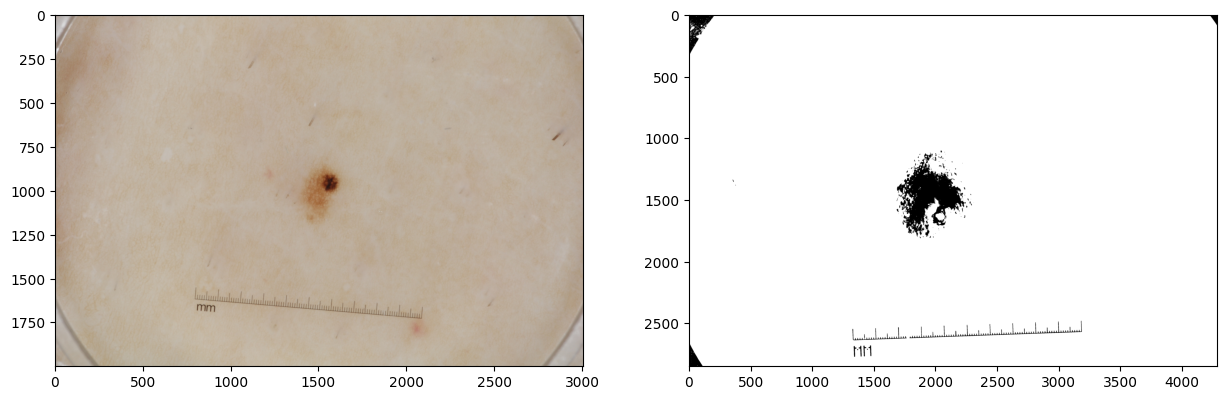

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open('work_dirs/result.png')
img_real = Image.open('/content/dataset/img_dir/ISIC2018_Task1-2_Test_Input/ISIC_0012292.jpg')
gray_img = np.array(img.convert('L'))

# Apply a threshold to the pixel values to create a binary mask
threshold = 40
binary_mask = (gray_img > threshold).astype(np.uint8)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(1,2,figsize=(15, 15))
ax[0].imshow(img_real)
ax[1].imshow(binary_mask, cmap='gray')

plt.show()

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from mmengine import Config
cfg = Config.fromfile('/content/mmsegmentation/configs/segformer/segformer_mit-b0_8xb2-160k_ade20k-512x512.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='SyncBN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='pretrain/mit_b0.pth',
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=32,
        num_stages=4,
        num_layers=[2, 2, 2, 2],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1),
    deco

In [ ]:
cfg.model.pretrained = "/content/mit_b0.pth"

In [ ]:
# modify num classes of the model in decode head

cfg.model.decode_head.num_classes = 1



# Modify dataset type and batch
cfg.dataset_type = 'ISICTask1DatasetX'

cfg.data_root = '/content/dataset'

cfg.train_dataloader.batch_size = 1
cfg.train_dataloader.num_workers = 1
cfg.val_dataloader.num_workers = 1


cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path='img_dir/ISIC2018_Task1-2_Training_Input', seg_map_path='ann_dir/ISIC2018_Task1_Training_GroundTruth')
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path='img_dir/ISIC2018_Task1-2_Test_Input', seg_map_path='ann_dir/ISIC2018_Task1_Validation_GroundTruth')
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline

cfg.test_dataloader.dataset.type = cfg.dataset_type
cfg.test_dataloader.dataset.data_root = cfg.data_root
cfg.test_dataloader.dataset.data_prefix = dict(img_path='img_dir/ISIC2018_Task1-2_Test_Input', seg_map_path='ann_dir/ISIC2018_Task1_Test_GroundTruth')
cfg.test_dataloader.dataset.pipeline = cfg.test_pipeline


cfg.load_from = "https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b0_512x512_160k_ade20k/segformer_mit-b0_512x512_160k_ade20k_20210726_101530-8ffa8fda.pth"
# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'
# cfg.train_cfg = dict(
#     type='EpochBasedTrainLoop', max_epochs=5, val_begin=1, val_interval=1)

cfg.train_cfg = dict(
    type='IterBasedTrainLoop', max_iters=200, val_interval=200)


cfg.default_hooks = dict(
    timer=dict(type='IterTimerHook'),
    logger=dict(type='LoggerHook', interval=50, log_metric_by_epoch=True),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(type='CheckpointHook', interval = 100, by_epoch=False),
    sampler_seed=dict(type='DistSamplerSeedHook'))


cfg.param_scheduler = [
    dict(type='LinearLR', by_epoch=False, start_factor=0.1, begin=0, end=200),
    dict(
        type='PolyLR',
        eta_min=0.0001,
        power=0.9,
        begin=0,
        end=160,
        by_epoch=False)
]

cfg.log_processor = dict(by_epoch=False)
cfg['randomness'] = dict(seed=32)

In [ ]:
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='SyncBN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 512))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 512)),
    pretrained='pretrain/mit_b0.pth',
    backbone=dict(
        type='MixVisionTransformer',
        in_channels=3,
        embed_dims=32,
        num_stages=4,
        num_layers=[2, 2, 2, 2],
        num_heads=[1, 2, 5, 8],
        patch_sizes=[7, 3, 3, 3],
        sr_ratios=[8, 4, 2, 1],
        out_indices=(0, 1, 2, 3),
        mlp_ratio=4,
        qkv_bias=True,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.1),
    deco

In [ ]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)

05/11 13:59:02 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 32
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm

/content/mmsegmentation/mmseg/models/backbones/mit.py:365: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/decode_heads/decode_head.py:136: UserWarning: threshold is not defined for binary, and defaultsto 0.3
  warnings.warn('threshold is not defined for binary, and defaults'
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


05/11 13:59:12 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/11 13:59:12 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

In [ ]:
import torch
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 9            |        cudaMalloc retries: 9         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      | 653643 KiB |   9284 MiB |  40017 MiB |  39378 MiB |\n|       from large pool | 625963 KiB |   9269 MiB |  39912 MiB |  39301 MiB |\n|       from small pool |  27680 KiB |     28 MiB |    104 MiB |     77 MiB |\n|---------------------------------------------------------------------------|\n| Active memory         | 653643 KiB |   9284 MiB |  40017 MiB |  39378 MiB |\n|       from large pool | 625963 KiB |   9269 MiB |

In [21]:
runner.test()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


OutOfMemoryError: ignored